In [45]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint

In [46]:
file = '../Mango5/imdb_top_1000.csv'

In [47]:
topmovies_df = pd.read_csv(file, encoding = "ISO-8859-1")

In [48]:
genre_topmovies_df = topmovies_df[["Genre", "IMDB_Rating"]]
result_genre = genre_topmovies_df.set_index('IMDB_Rating').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')
genre_values = result_genre["Genre"].value_counts().to_frame()
genre = genre_values.reset_index()
x_axis_genre = genre['index']
y_axis_genre = genre["Genre"]

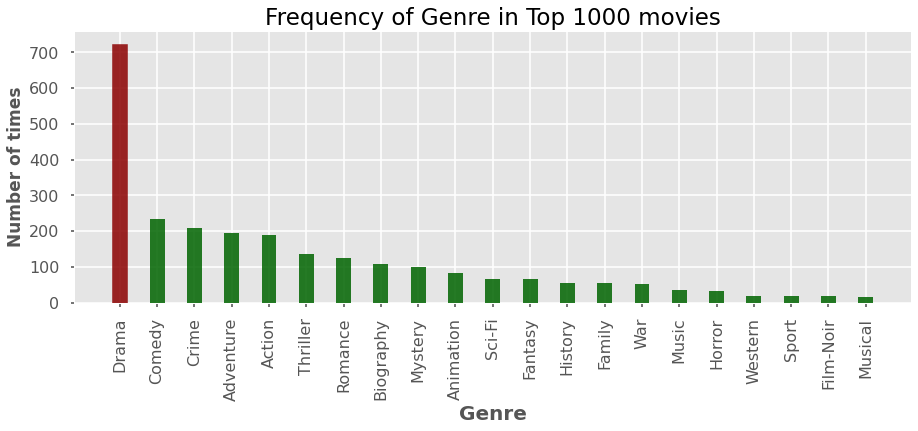

In [86]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_genre, y_axis_genre, width=0.4, color='darkgreen', alpha=0.85, align="center")
barplot_genre[0].set_color('darkred')
plt.title("Frequency of Genre in Top 1000 movies", fontsize = 23)
plt.xlabel('Genre', fontsize = 20, weight = 'bold')
plt.ylabel('Number of times', fontsize = 17, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [50]:
topmovies_df['star_df'] = topmovies_df['Star1'] + "," + topmovies_df['Star2'] + "," + topmovies_df['Star3'] + "," + topmovies_df['Star4']
star_topmovies_df = topmovies_df[["star_df", "IMDB_Rating"]]
result_star = star_topmovies_df.set_index('IMDB_Rating').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')
star_values = result_star["star_df"].value_counts().to_frame()
stars = star_values.where(star_values['star_df'] >= 7).dropna().reset_index()
x_axis_stars = stars['index']
y_axis_stars = stars["star_df"]

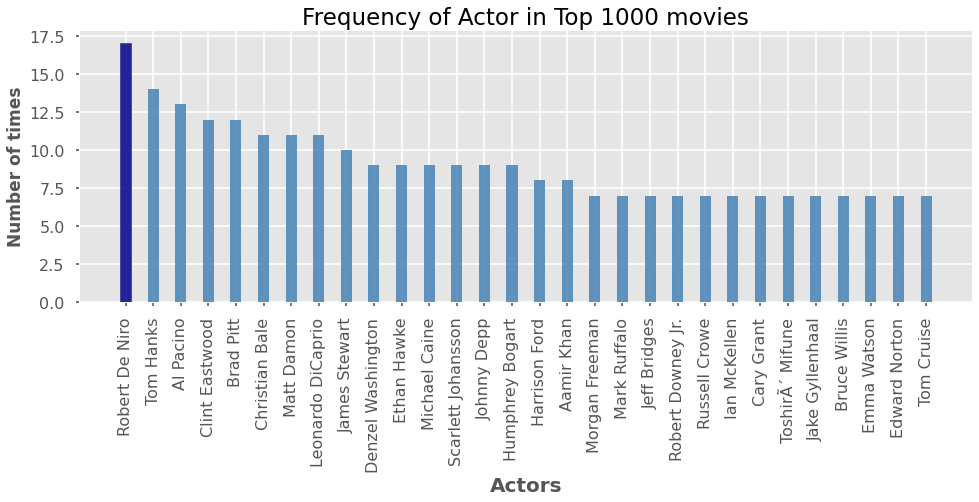

In [87]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(16,5))
barplot_stars = plt.bar(x_axis_stars, y_axis_stars, width=0.4, color='steelblue', alpha=0.85, align="center")
barplot_stars[0].set_color('darkblue')
plt.title("Frequency of Actor in Top 1000 movies", fontsize = 23)
plt.xlabel('Actors', fontsize = 20, weight = 'bold')
plt.ylabel('Number of times', fontsize = 17, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [52]:
director_df = topmovies_df['Director'].value_counts().to_frame()
director_topmovies_df = topmovies_df[["Director", "IMDB_Rating"]]
result_director = director_topmovies_df.set_index('IMDB_Rating').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')
director_values = result_director["Director"].value_counts().to_frame()
directors = director_values.where(director_values['Director'] >= 6).dropna().reset_index()
x_axis_dir = directors['index']
y_axis_dir = directors["Director"]

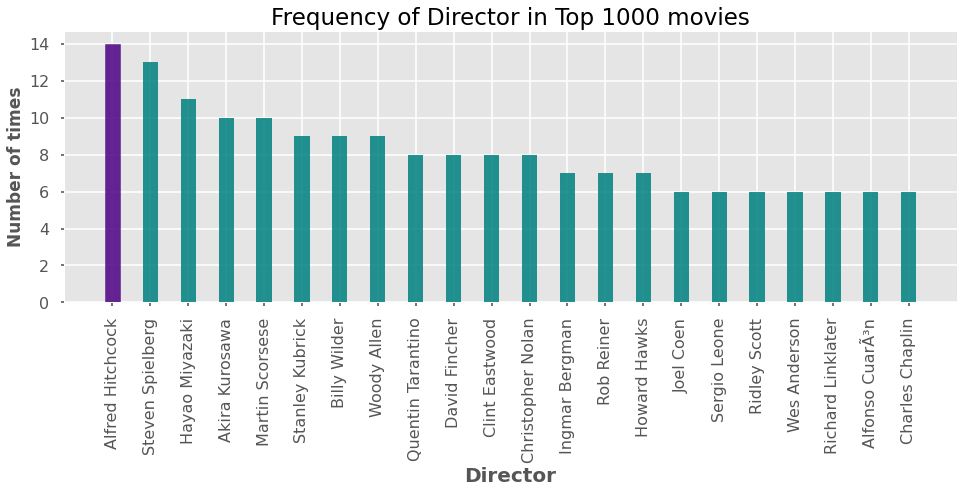

In [88]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(16,5))
barplot_dir = plt.bar(x_axis_dir, y_axis_dir, width=0.4, color='teal', alpha=0.85, align="center")
barplot_dir[0].set_color('indigo')
plt.title("Frequency of Director in Top 1000 movies", fontsize = 23)
plt.xlabel('Director', fontsize = 20, weight = 'bold')
plt.ylabel('Number of times', fontsize = 17, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [54]:
url = "http://www.omdbapi.com/?t="
api_key = '&apikey=b36a93d3'

In [67]:
def movie_score_calculator():
    title_input = input("What is the movie title? ")
    
    data = requests.get(url + title_input + api_key).json()
    
    directors_name = data['Director']
    actors_name = data['Actors']
    genre_name = data['Genre']

    total_director_score = 0
    total_genre_score = 0
    total_actor_score = 0
    total_score = 0
    
    for director_name in directors_name.split(", "):
        try:
            total_director_score += int(director_values.loc[director_name])
        except:
            total_director_score += 0
            pass
        
    for actor_name in actors_name.split(", "):
        try:
            total_actor_score += float(star_values.loc[actor_name])
        except:
            total_actor_score += 0
            pass
        
    for genre_name in genre_name.split(", "):
        try:
            total_genre_score += float(genre_values.loc[genre_name]/100)
        except:
            total_genre_score += 0
            pass
        
    total_genre_score = total_genre_score/3
        
    total_score = total_director_score + total_actor_score + total_genre_score

    print(directors_name)
    print(total_director_score)
    print(actors_name)
    print(total_actor_score)
    print(genre_name)
    print(total_genre_score)
    print(total_score)

In [192]:
def movie_score_calculator_ad(title):
    title_input = title
    
    data = requests.get(url + title_input + api_key).json()
    
    directors_name = data['Director']
    actors_name = data['Actors']
    genre_name = data['Genre']

    total_director_score = 0
    total_genre_score = 0
    total_actor_score = 0
    total_score = 0
    
    for director_name in directors_name.split(", "):
        try:
            total_director_score += int(director_values.loc[director_name])
        except:
            total_director_score += 0
            pass
        
    for actor_name in actors_name.split(", "):
        try:
            total_actor_score += float(star_values.loc[actor_name])
        except:
            total_actor_score += 0
            pass
        
    for genre_name in genre_name.split(", "):
        try:
            total_genre_score += float(genre_values.loc[genre_name])
        except:
            total_genre_score += 0
            pass
        
    total_director_score = (total_director_score*40)/14
    
    total_actor_score = (total_actor_score*40)/42
        
    total_genre_score = (total_genre_score*20)/1182
        
    total_score = round(total_director_score + total_actor_score + total_genre_score, 2)

    
    print(total_director_score)
    print(total_actor_score)
    print(total_genre_score)
    print(total_score)

In [156]:
movie_score_calculator()

What is the movie title? aliens
James Cameron
5
Sigourney Weaver, Michael Biehn, Carrie Henn
7.0
Sci-Fi
1.5066666666666666
13.506666666666666


In [193]:
the_list = ["Last Survivors","Moonfall","The Long Night", "The Wolf and the Lion"
]

In [194]:
for title in the_list:
    movie_score_calculator_ad(title)

0.0
0.0
3.451776649746193
3.45
0.0
0.9523809523809523
7.631133671742809
8.58
0.0
5.714285714285714
12.571912013536378
18.29
0.0
1.9047619047619047
0.9475465313028765
2.85
